In [19]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from numpy import median
from scipy.stats import ranksums
import numpy as np
import scipy.stats
import os
import fnmatch
import rear_analysis
import h5py
import statistics 
processed= 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/processed/'
processed= 'C:/Users/Fabian/Desktop/Rearing_analysis/processed'

In [6]:
rat_ID = 'FS11'


FS11 = h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5' ,mode='r')

In [7]:
#n= FS11.keys()[1]


In [8]:
n1 = FS11.get('20211006-161633')
n1

<HDF5 group "/20211006-161633" (271 members)>

In [9]:
n1 = np.array(n1)
n1.shape


(271,)

In [10]:
FS11.close()

In [11]:

def descend_obj(obj,sep='\t'):
    """
    Iterate through groups in a HDF5 file and prints the groups and datasets names and datasets attributes
    """
    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        for key in obj.keys():
            print (sep,'-',key,':',obj[key])
            descend_obj(obj[key],sep=sep+'\t')
    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            print (sep+'\t','-',key,':',obj.attrs[key])

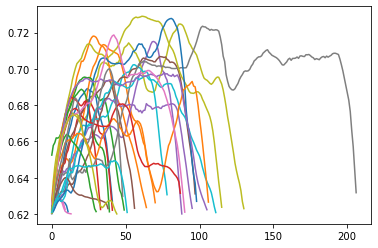

In [12]:
with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as FS11:
    keys= (list(FS11.keys()))
    for key in keys: 
        ten = FS11.get(key+'/10')
    #print(descend_obj(FS11['20211006-161633']))
    
    #print(ten[:,2])
#     n1 = FS11.get('20211006-161633/10')
#     n1 = np.array(n1)
        plt.plot(ten[:,2])

### Make histogram of all rears per animal  

In [13]:
def allkeys(obj):
    "Recursively find all keys in an h5py.Group."
    keys = (obj.name,)
    if isinstance(obj, h5py.Group):
        for key, value in obj.items():
            if isinstance(value, h5py.Group):
                keys = keys + allkeys(value)
            else:
                keys = keys + (value.name,)
    return keys

(array([5.386e+03, 1.670e+03, 4.740e+02, 1.780e+02, 7.000e+01, 2.800e+01,
        1.400e+01, 6.000e+00, 4.000e+00, 2.000e+00]),
 array([ 0.        ,  2.26299999,  4.52599998,  6.78899996,  9.05199995,
        11.31499994, 13.57799993, 15.84099991, 18.1039999 , 20.36699989,
        22.62999988]),
 <a list of 10 Patch objects>)

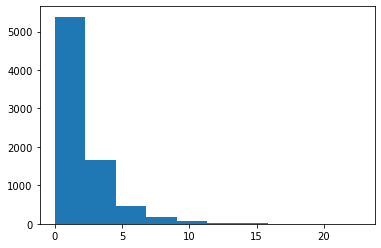

In [45]:
rat_ID= 'FS08'

with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
    keys = allkeys(rat)
    lenght = []
    for key in keys: 
        #print(key)
        if len(key)>17:
            rear = rat.get(key)
            lenght.append((rear[-1][0]-rear[0][0]))
            #plt.plot(rear[:,2])
plt.hist(lenght,)      
    
#     keys= (list(rat.keys()))
#     for key in keys:
#         if isinstance(value, h5py.Group):
#                 keys = keys + allkeys(value)
#         rear_num=(list(rat.get(keys).keys()))

In [46]:
ten_lenght = [i*10 for i in lenght ]

1.4199998378753662


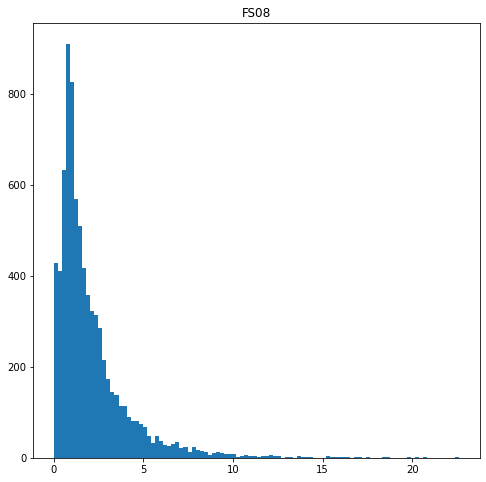

In [49]:
binwidth=1
plt.figure(figsize=(8,8))
plt.hist(lenght,bins = 100)# bins=range(int(min(ten_lenght)),int(max(lenght)) + binwidth, binwidth
plt.plot(statistics.median(lenght),c='red')
plt.title(rat_ID)
print(statistics.median(lenght))

TypeError: 'AxesSubplot' object is not subscriptable

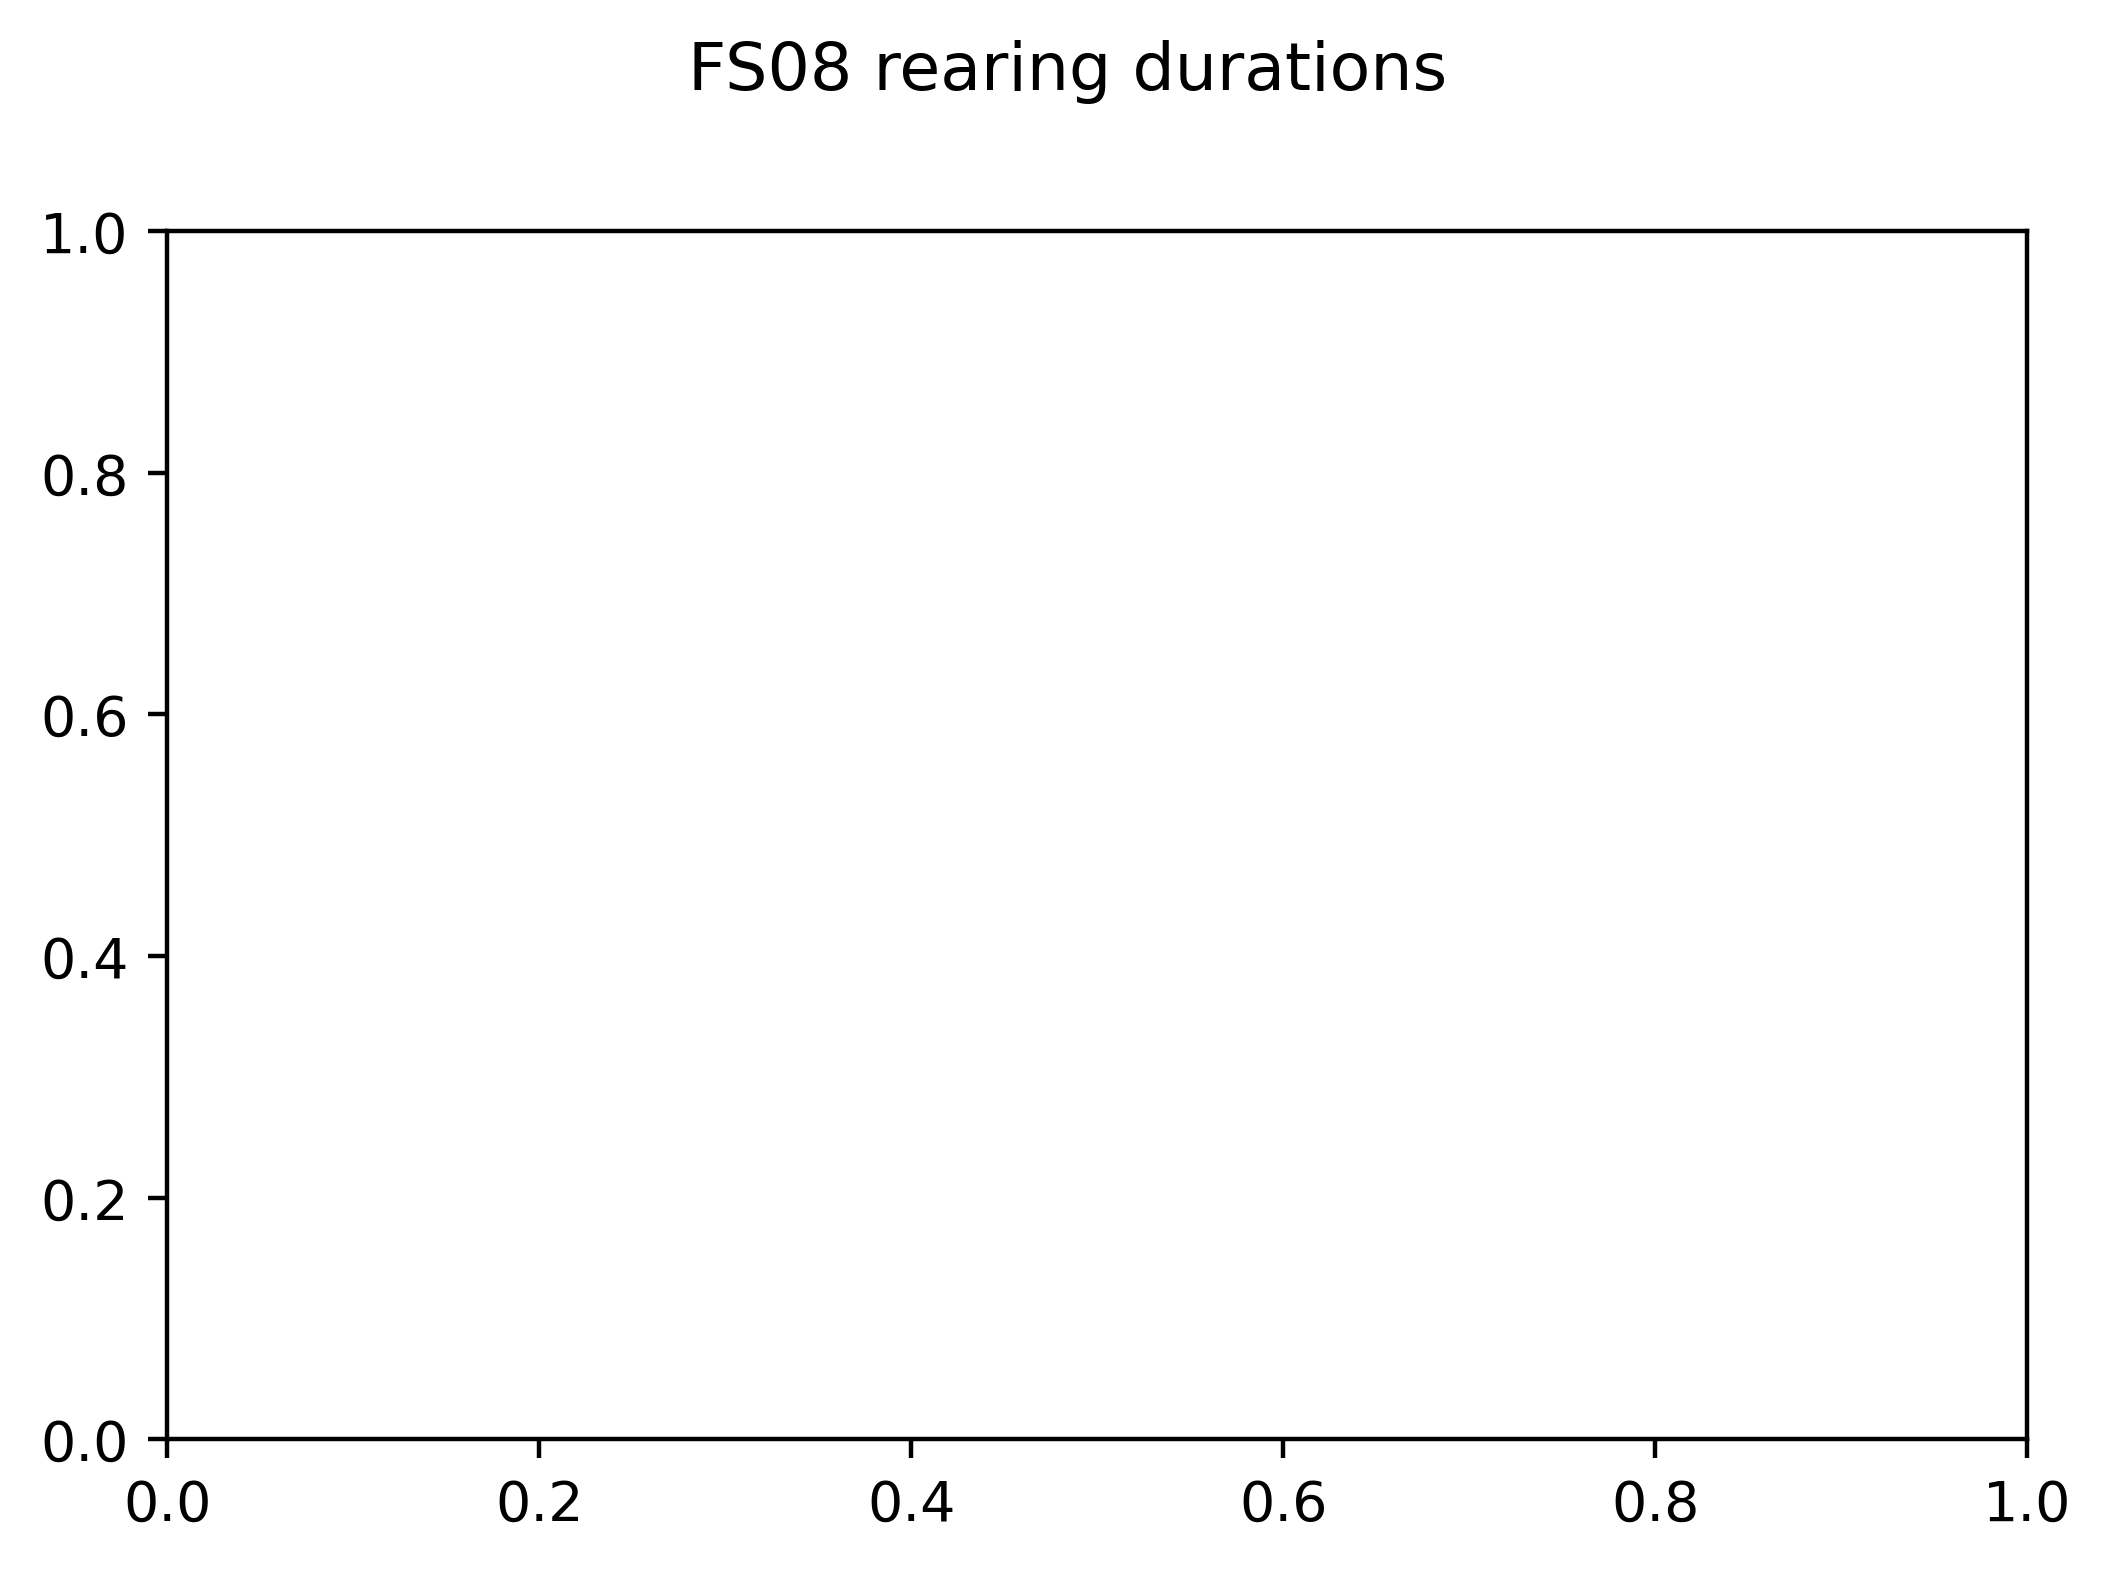

In [29]:

def make_simple_graphs (animal_ID,lenght):
    binwidth=.075
    plt.tight_layout
    bins = np.arange(0, 1.5 + binwidth, binwidth)
    bins[1]= 0.085
    fig, ax = plt.subplots(1,dpi=400,sharex=False)
    fig.suptitle(animal_ID +' rearing durations',y=1)

    N, bins, patches=ax[0].hist(ten_lenght)
    ax.set_title('rear duration')
    fig.tight_layout(pad=1.5)
        
    #plt.savefig('%srat_rearing_distance_from_beacons_simple%s.png'%(figures,animal_ID), dpi = 100)

    
make_simple_graphs('FS08' ,ten_lenght) 

### Need to make list of all tags only in sublists

### Plot only rears within vicinity of the beacon  VS. further away

In [57]:
FS11=pd.read_excel(processed +'FS11_rears_all.xlsx', index_col=0)
FS11_one_day= rear_analysis.day_cutter('FS11',In_arena=True, days=(20,21))

### Plot rears which are visible and which are invisible

# GRAVEYARD

In [11]:
with h5py.File(h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5' , mode='r') as FS11:
    n1 = FS11.get('20211006-161633')
    n1 = np.array(n1)
    plt.plot(n1[2])

SyntaxError: invalid syntax (<ipython-input-11-a3854c42bf94>, line 1)